# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<AxesSubplot:xlabel='item_name'>

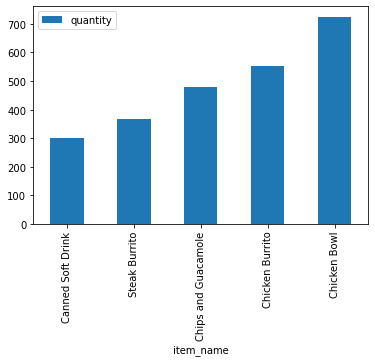

In [5]:
chipo.groupby('item_name').agg({'quantity':'count'}).sort_values(by='quantity').tail().plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

<AxesSubplot:xlabel='item_price_float', ylabel='quantity'>

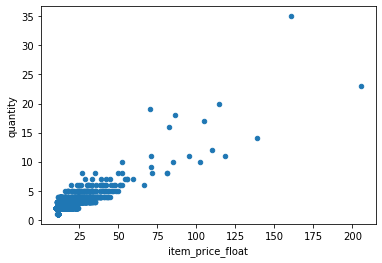

In [6]:
chipo['item_price_float'] = chipo['item_price'].apply(
    lambda x: float(x[1:])
)
order_prices = chipo.groupby('order_id').agg({'item_price_float':'sum'})
order_quantity = chipo.groupby('order_id').agg({'quantity':'sum'})
pd.concat([order_prices, order_quantity], axis=1).plot(x='item_price_float', y='quantity', kind='scatter')

### Step 7. BONUS: Create a question and a graph to answer your own question.

### As individual item price increases, does the quantity ordered decrease?